# Emerging Technologies Project Notebook

***

### Project Task

The main goal of the project is to create a web service that uses machine learning to make predictions based on the data set powerproduction.

This notebook will attempt to produce a model that accurately predicts wind turbine power output from wind speed
values.

It will then save the model locally, which will be used in a webservice.

### Goals:

- Read in our data
- Train the data
- Make predictions based on speed and power
- Expose our data model to a webservice (saving the model localy to be accessed by our script) 

***

In [14]:
# data manipulation imports
import pandas as pd
import numpy as np
import os

# Machine learning
import tensorflow.keras as kr

# plotting
import matplotlib.pyplot as plt

In [20]:
# Save our dataset to a variable and print
dataset = pd.read_csv(
    "https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")

dataset

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


### Training the data

- We now need to train our data using the sequential method.
- We add our inputs and model managing parameters.
- Compile.
- Fit the data.
- Display the loss

In [23]:
# Build the model.
model = kr.models.Sequential()
model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))
model.compile('adam', loss='mean_squared_error')
# Fit the data.
model.fit(dataset['speed'], dataset['power'], epochs=100)

Epoch 1/100
16/16 [==============================] - 0s 798us/step - loss: 2591.6907
Epoch 2/100
16/16 [==============================] - 0s 667us/step - loss: 2539.7219
Epoch 3/100
16/16 [==============================] - 0s 602us/step - loss: 2435.0726
Epoch 4/100
16/16 [==============================] - 0s 666us/step - loss: 2318.0037
Epoch 5/100
16/16 [==============================] - 0s 602us/step - loss: 2450.1334
Epoch 6/100
16/16 [==============================] - 0s 600us/step - loss: 2335.1287
Epoch 7/100
16/16 [==============================] - 0s 668us/step - loss: 2285.2975
Epoch 8/100
16/16 [==============================] - 0s 668us/step - loss: 2403.9020
Epoch 9/100
16/16 [==============================] - 0s 600us/step - loss: 2403.1846
Epoch 10/100
16/16 [==============================] - 0s 667us/step - loss: 2339.6113
Epoch 11/100
16/16 [==============================] - 0s 602us/step - loss: 2194.6239
Epoch 12/100
16/16 [==============================] - 0s 600us/

16/16 [==============================] - 0s 600us/step - loss: 1032.9569
Epoch 97/100
16/16 [==============================] - 0s 602us/step - loss: 1079.7182
Epoch 98/100
16/16 [==============================] - 0s 667us/step - loss: 1156.2409
Epoch 99/100
16/16 [==============================] - 0s 600us/step - loss: 1044.7335
Epoch 100/100
16/16 [==============================] - 0s 600us/step - loss: 1106.9873


In [22]:
#Take four values and display their predictions.
model.predict([1.0,2.0,3.0,100.0])

array([[  3.713],
       [  6.083],
       [  8.452],
       [238.313]], dtype=float32)

In [24]:
# Evaluate the neural network on the data.
model.evaluate(dataset['speed'], dataset['power'])

16/16 [==============================] - 0s 602us/step - loss: 1087.7998


1087.7998046875

***
### Plotting

Below we plot our models speed as it runs through our trained data.

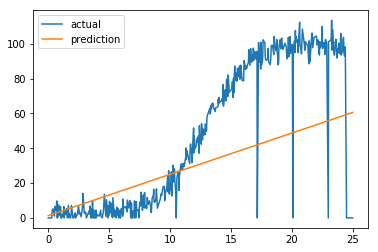

In [21]:
plt.plot(dataset['speed'], dataset['power'], label='actual')
plt.plot(dataset['speed'], model.predict(dataset['speed']), label='prediction')
plt.legend()
plt.show()

In [19]:
# saving the model localy to be accessed by our script
model.save(os.path.join("model.h5"))

***
# End
***